In [1]:
import os
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px


In [8]:
directory_list = [
    os.path.join('..', 'Inputs_outputs_excels', 'wsv_rhine_export_with_outliers_balanced.xlsx'),
    os.path.join('..', 'Inputs_outputs_excels', 'wsv_rhine_export - pseudo_huber_29_4_2024.xlsx'),
    os.path.join('..', 'Inputs_outputs_excels', 'wsv_rhine_export_outliers_pseudo_huber.xlsx')
]

df_pseudo = pd.read_excel(directory_list[1])
df_balanced_outlier = pd.read_excel(directory_list[0])
df_pseudo_outlier = pd.read_excel(directory_list[2])
df_pseudo_outlier.index = pd.to_datetime(df_pseudo['Date'],format='%d.%m.%Y')

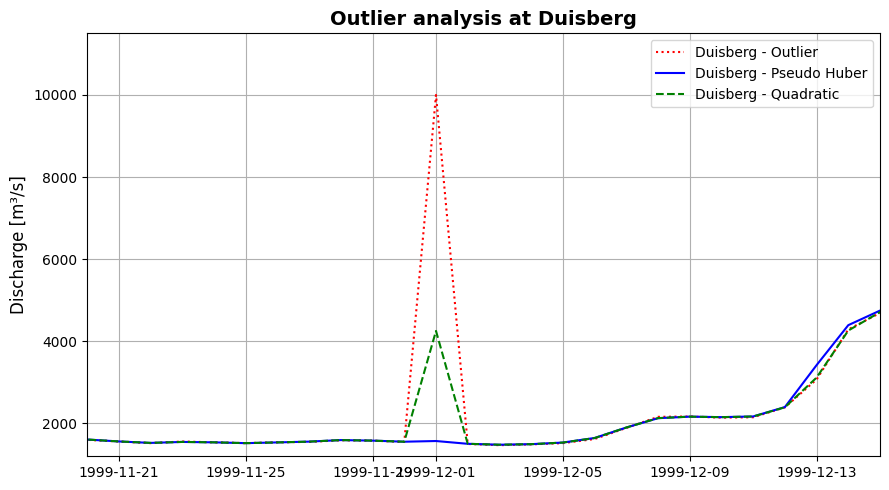

In [9]:
start_date='20/11/1999'
end_date='15/12/1999'

start_date_obj = datetime.strptime(start_date, '%d/%m/%Y')
end_date_obj = datetime.strptime(end_date, '%d/%m/%Y')

fig, (ax1) = plt.subplots(1, 1, figsize=(9, 5))

ax1.plot(df_pseudo_outlier.index, df_pseudo_outlier['DUISB/flow.obs'], label='Duisberg - Outlier', linestyle='dotted', color='red')
ax1.plot(df_pseudo_outlier.index, df_pseudo_outlier['DUISB/flow'], label='Duisberg - Pseudo Huber', color='blue')
ax1.plot(df_pseudo_outlier.index, df_balanced_outlier['DUISB/flow'], label='Duisberg - Quadratic', linestyle='dashed', color='green')

ax1.set_title('Outlier analysis at Duisberg', fontsize=14, fontweight='bold')
ax1.set_ylabel('Discharge [m³/s]', fontsize=12)
ax1.set_xlim(start_date_obj, end_date_obj)
ax1.set_ylim(1200, 11500)
ax1.grid(True)
ax1.legend()

plt.tight_layout()
plt.savefig('outlier_presentation.png')
plt.show()